# Digits recognitions

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

print('Tensorflow version:', tf.__version__)
print('Keras version:', tf.keras.__version__)

Tensorflow version: 2.0.0
Keras version: 2.2.4-tf


In [2]:
# 60000 of 28x28 px images of hand-written digits from 0 to 9
mnist_dataset = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist_dataset.load_data()

In [3]:
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


In [4]:
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


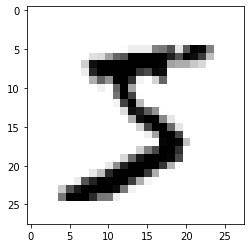

In [5]:
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

In [6]:
x_train = tf.keras.utils.normalize(x_train)
x_test = tf.keras.utils.normalize(x_test)

In [7]:
# with np.printoptions(precision=2, suppress=True):
#     print(x_train[0])

with pd.option_context('display.float_format', '{:,.2f}'.format):
    display(pd.DataFrame(x_train[0]))

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.36,0.05,0.34,0.52,0.51,0.26,0.00,0.00,0.00,0.00
6,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.05,...,0.28,0.22,0.32,0.31,0.25,0.08,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.06,0.29,0.31,...,0.11,0.10,0.10,0.07,0.05,0.00,0.00,0.00,0.00,0.00
8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.29,0.34,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.32,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


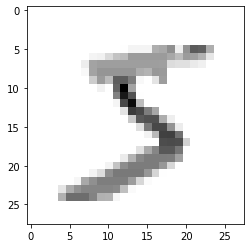

In [8]:
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

In [9]:
x_train.shape

(60000, 28, 28)

In [10]:
# Input layers.
l1 = tf.keras.layers.Flatten(input_shape=x_train.shape[1:])
l2 = tf.keras.layers.Dense(128, activation=tf.keras.activations.relu)
# Hidden layers.
l3 = tf.keras.layers.Dense(128, activation=tf.keras.activations.relu)
# Output layers.
l4 = tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)

# Combine layers together throuhg sequential model.
model = tf.keras.models.Sequential([l1, l2, l3, l4])

In [11]:
# Display the model's architecture
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

In [13]:
training_history = model.fit(x_train, y_train, epochs=4)

Train on 60000 samples
Epoch 1/4
60000/60000 [==============================] - 7s 117us/sample - loss: 0.2656 - accuracy: 0.9214
Epoch 2/4
60000/60000 [==============================] - 5s 81us/sample - loss: 0.1125 - accuracy: 0.9664
Epoch 3/4
60000/60000 [==============================] - 6s 104us/sample - loss: 0.0757 - accuracy: 0.9762
Epoch 4/4
60000/60000 [==============================] - 8s 129us/sample - loss: 0.0576 - accuracy: 0.9816


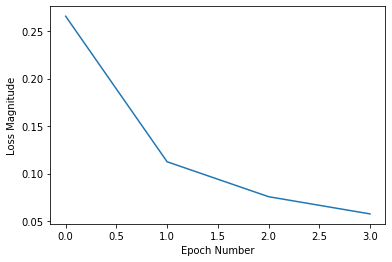

In [14]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss Magnitude')
plt.plot(training_history.history['loss'])

In [15]:
%%capture
train_loss, train_accuracy = model.evaluate(x_train, y_train)

In [16]:
print('Training loss: ', train_loss)
print('Training accuracy: ', train_accuracy)

Training loss:  0.03783799708237251
Training accuracy:  0.9881667


In [17]:
%%capture
validation_loss, validation_accuracy = model.evaluate(x_test, y_test)

In [18]:
print('Validation loss: ', validation_loss)
print('Validation accuracy: ', validation_accuracy)

Validation loss:  0.08384165156176314
Validation accuracy:  0.974


In [19]:
# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model shuold be saved to HDF5.
model_name = 'digits_recognition.h5'
model.save(model_name, save_format='h5')

In [20]:
loaded_model = tf.keras.models.load_model(model_name)

In [21]:
predictions = loaded_model.predict([x_test])

In [22]:
print('predictions:', predictions.shape)

predictions: (10000, 10)


In [23]:
pd.DataFrame(predictions)

,0,1,2,3,4,5,6,7,8,9
0,9.721489e-09,1.188351e-06,1.148611e-04,1.550670e-06,1.626537e-09,3.204902e-09,6.794982e-13,9.998816e-01,8.353274e-08,6.656423e-07
1,1.977307e-05,1.640623e-04,9.996898e-01,1.728246e-05,9.095530e-08,4.008393e-07,5.756002e-05,4.681029e-07,5.058225e-05,6.397607e-10
2,1.681262e-07,9.999561e-01,7.400783e-06,4.104093e-07,3.493849e-06,1.037894e-06,3.477965e-06,2.712492e-05,7.304575e-07,1.958528e-08
3,9.999520e-01,1.474946e-08,2.526258e-06,1.591330e-06,1.892978e-07,3.439658e-06,2.229401e-05,9.345658e-07,8.349178e-08,1.691539e-05
4,4.496532e-09,9.359073e-09,6.130465e-07,6.080660e-10,9.999578e-01,8.469228e-09,7.977867e-08,8.968672e-06,5.925106e-09,3.248914e-05
...,...,...,...,...,...,...,...,...,...,...
9995,6.090461e-10,1.632006e-05,9.994932e-01,3.039630e-04,6.939566e-11,1.929316e-09,2.322682e-11,2.764897e-06,1.837399e-04,3.714385e-10
9996,5.679313e-07,1.525070e-07,1.403722e-05,9.979739e-01,2.229678e-10,1.657753e-03,3.087887e-10,2.321457e-07,1.659249e-05,3.367129e-04
9997,5.663419e-10,1.707084e-07,4.432400e-10,1.737417e-08,9.998715e-01,6.318027e-09,5.025731e-09,6.583188e-05,2.281954e-06,6.017102e-05
9998,3.973408e-07,1.046451e-08,6.783094e-11,4.182937e-06,4.492138e-09,9.999834e-01,4.521985e-07,3.508899e-09,1.118966e-05,4.121923e-07


In [24]:
print(np.argmax(predictions[0]))

7


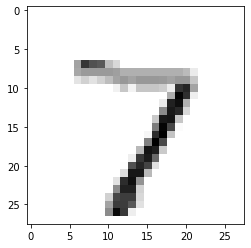

In [25]:
plt.imshow(x_test[0], cmap=plt.cm.binary)
plt.show()